<a href="https://colab.research.google.com/github/sobieddch90/mcd_udg_tfm-egg_analysis/blob/main/Alzheimer_Open_Neuro_EEG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Alzheimer EEG Analysis


- Author: Elmo Chavez
- Date: 15-Jun-2023


## Dataset Description

This dataset contains the EEG resting state-closed eyes recordings from 88 subjects in total.

Participants:

- 36 of them were diagnosed with Alzheimer's disease (AD group)
- 23 were diagnosed with Frontotemporal Dementia (FTD group)
- 29 were healthy subjects (CN group).

Cognitive and neuropsychological state was evaluated by the international Mini-Mental State Examination (MMSE). MMSE score ranges from 0 to 30, with lower MMSE indicating more severe cognitive decline.

The duration of the disease was measured in months and the median value was 25 with IQR range (Q1-Q3) being 24 - 28.5 months. Concerning the AD groups, no dementia-related comorbidities have been reported.

The average MMSE was:

- For the AD group was 17.75 (sd=4.5)
- For the FTD group was 22.17 (sd=8.22)
- For the CN group was 30.

The mean age:

- AD group was 66.4 (sd=7.9)
- FTD group was 63.6 (sd=8.2)
- CN group was 67.9 (sd=5.4).

Source Dataset:\
[Open Neuro: Alzheimer's disease, Frontotemporal dementia and Healthy subjects](https://openneuro.org/datasets/ds004504/versions/1.0.5)


## Libraries

**OPEN NEURO**\
A Python client for accessing OpenNeuro datasets.\
https://pypi.org/project/openneuro-py/

Installing Open Neuro package:

Using a local environment with conda requires several packages before install Openneuro. Please make sure you already installed the following packages:

- `conda install -c anaconda jupyter`
- `conda update ipywidgets`
- `conda install -c conda-forge tqdm`

Then, to install Open Neuro can be throught the following commands:

- Pip: `pip install openneuro-py`
- Conda: `conda install -c conda-forge openneuro-py`

**MNE**\
Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG, sEEG, ECoG, NIRS, and more.\
https://mne.tools/stable/index.html

- Pip: `pip install mne`
- Conda: `conda install -c conda-forge mne-base`

_Suggestion_: Create a new conda environment to install MNE

**HMMLEARN**\
Is a set of algorithms for unsupervised learning and inference of Hidden Markov Models. For supervised learning learning of HMMs and similar models see seqlearn.\
https://hmmlearn.readthedocs.io/en/latest/index.html

- Pip: `!pip install hmmlearn`
- Conda: `conda install -c conda-forge hmmlearn`


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import openneuro as on
import mne
import os

#from hmmlearn import hmm

# Download Dataset

Downloading the dataset directly from the website using openneuro package.

**PD**: _running the download command may take several minutes to load and download all the datasets._


In [ ]:
# Run this code when use colab
# !mkdir /content/dataset 
# output_dir = "/content/dataset"

# Set direction to store the dataset
output_dir = os.getcwd()+'/dataset'

dataset_id = "ds004504"

on.download(dataset=dataset_id, target_dir=output_dir)


👋 Hello! This is openneuro-py 2023.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004504 …


📁 Traversing directories for ds004504 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 357 files (5 concurrent downloads). 
✅ Finished downloading ds004504.
 
🧠 Please enjoy your brains.
 


Skipping README: already downloaded.: 100%|##########| 6.61k/6.61k [00:00<?, ?B/s]

Skipping dataset_description.json: already downloaded.: 100%|##########| 2.80k/2.80k [00:00<?, ?B/s]

Skipping participants.json: already downloaded.: 100%|##########| 613/613 [00:00<?, ?B/s]

Skipping participants.tsv: already downloaded.: 100%|##########| 1.67k/1.67k [00:00<?, ?B/s]

Skipping CHANGES: already downloaded.: 100%|##########| 327/327 [00:00<?, ?B/s]

Skipping sub-003_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 12.5M/12.5M [00:00<?, ?B/s]

Skipping sub-001_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 23.2M/23.2M [00:00<?, ?B/s]

Skipping sub-004_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 28.7M/28.7M [00:00<?, ?B/s]

Skipping sub-002_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.7M/30.7M [00:00<?, ?B/s]

Skipping sub-005_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.1M/31.1M [00:00<?, ?B/s]

Skipping sub-009_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 24.9M/24.9M [00:00<?, ?B/s]

Skipping sub-006_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 25.7M/25.7M [00:00<?, ?B/s]

Skipping sub-007_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.1M/31.1M [00:00<?, ?B/s]

Skipping sub-008_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.2M/32.2M [00:00<?, ?B/s]

Skipping sub-010_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 52.0M/52.0M [00:00<?, ?B/s]

Skipping sub-011_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.3M/31.3M [00:00<?, ?B/s]

Skipping sub-012_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 35.9M/35.9M [00:00<?, ?B/s]

Skipping sub-013_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.0M/34.0M [00:00<?, ?B/s]

Skipping sub-014_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 37.9M/37.9M [00:00<?, ?B/s]

Skipping sub-015_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 36.6M/36.6M [00:00<?, ?B/s]

Skipping sub-016_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 39.5M/39.5M [00:00<?, ?B/s]

Skipping sub-017_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.2M/34.2M [00:00<?, ?B/s]

Skipping sub-020_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.6M/33.6M [00:00<?, ?B/s]

Skipping sub-018_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.3M/34.3M [00:00<?, ?B/s]

Skipping sub-019_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 37.3M/37.3M [00:00<?, ?B/s]

Skipping sub-025_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 27.8M/27.8M [00:00<?, ?B/s]

Skipping sub-024_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.9M/30.9M [00:00<?, ?B/s]

Skipping sub-022_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.4M/33.4M [00:00<?, ?B/s]

Skipping sub-023_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.9M/33.9M [00:00<?, ?B/s]

Skipping sub-021_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 37.4M/37.4M [00:00<?, ?B/s]

Skipping sub-030_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 22.5M/22.5M [00:00<?, ?B/s]

Skipping sub-029_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.9M/29.9M [00:00<?, ?B/s]

Skipping sub-026_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 36.5M/36.5M [00:00<?, ?B/s]

Skipping sub-028_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.2M/33.2M [00:00<?, ?B/s]

Skipping sub-027_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.6M/33.6M [00:00<?, ?B/s]

Skipping sub-033_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 28.7M/28.7M [00:00<?, ?B/s]

Skipping sub-032_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.4M/32.4M [00:00<?, ?B/s]

Skipping sub-035_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.1M/30.1M [00:00<?, ?B/s]

Skipping sub-034_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 39.4M/39.4M [00:00<?, ?B/s]

Skipping sub-031_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 46.7M/46.7M [00:00<?, ?B/s]

Skipping sub-039_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.5M/34.5M [00:00<?, ?B/s]

Skipping sub-037_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.1M/30.1M [00:00<?, ?B/s]

Skipping sub-036_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.2M/34.2M [00:00<?, ?B/s]

Skipping sub-038_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 36.2M/36.2M [00:00<?, ?B/s]

Skipping sub-040_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 39.2M/39.2M [00:00<?, ?B/s]

Skipping sub-043_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.1M/32.1M [00:00<?, ?B/s]

Skipping sub-044_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.1M/34.1M [00:00<?, ?B/s]

Skipping sub-041_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 36.0M/36.0M [00:00<?, ?B/s]

Skipping sub-045_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.6M/34.6M [00:00<?, ?B/s]

Skipping sub-042_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 39.1M/39.1M [00:00<?, ?B/s]

Skipping sub-046_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.6M/30.6M [00:00<?, ?B/s]

Skipping sub-049_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.7M/31.7M [00:00<?, ?B/s]

Skipping sub-047_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.8M/32.8M [00:00<?, ?B/s]

Skipping sub-050_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.2M/33.2M [00:00<?, ?B/s]

Skipping sub-048_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 40.2M/40.2M [00:00<?, ?B/s]

Skipping sub-051_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.6M/30.6M [00:00<?, ?B/s]

Skipping sub-052_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.9M/30.9M [00:00<?, ?B/s]

Skipping sub-053_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.7M/31.7M [00:00<?, ?B/s]

Skipping sub-055_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.1M/33.1M [00:00<?, ?B/s]

Skipping sub-054_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.0M/34.0M [00:00<?, ?B/s]

Skipping sub-058_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.7M/30.7M [00:00<?, ?B/s]

Skipping sub-056_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.2M/32.2M [00:00<?, ?B/s]

Skipping sub-057_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.8M/30.8M [00:00<?, ?B/s]

Skipping sub-060_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.4M/30.4M [00:00<?, ?B/s]

Skipping sub-059_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.0M/32.0M [00:00<?, ?B/s]

Skipping sub-061_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.6M/32.6M [00:00<?, ?B/s]

Skipping sub-062_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 36.5M/36.5M [00:00<?, ?B/s]

Skipping sub-063_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.7M/32.7M [00:00<?, ?B/s]

Skipping sub-064_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.4M/34.4M [00:00<?, ?B/s]

Skipping sub-065_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.2M/34.2M [00:00<?, ?B/s]

Skipping sub-066_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 22.3M/22.3M [00:00<?, ?B/s]

Skipping sub-067_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 24.9M/24.9M [00:00<?, ?B/s]

Skipping sub-068_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 23.3M/23.3M [00:00<?, ?B/s]

Skipping sub-070_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 18.6M/18.6M [00:00<?, ?B/s]

Skipping sub-069_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 25.8M/25.8M [00:00<?, ?B/s]

Skipping sub-071_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 25.2M/25.2M [00:00<?, ?B/s]

Skipping sub-072_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 26.7M/26.7M [00:00<?, ?B/s]

Skipping sub-073_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.7M/34.7M [00:00<?, ?B/s]

Skipping sub-075_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.4M/30.4M [00:00<?, ?B/s]

Skipping sub-074_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 41.2M/41.2M [00:00<?, ?B/s]

Skipping sub-076_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.7M/31.7M [00:00<?, ?B/s]

Skipping sub-077_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 28.4M/28.4M [00:00<?, ?B/s]

Skipping sub-079_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.2M/33.2M [00:00<?, ?B/s]

Skipping sub-078_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 35.4M/35.4M [00:00<?, ?B/s]

Skipping sub-080_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 37.2M/37.2M [00:00<?, ?B/s]

Skipping sub-081_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.5M/33.5M [00:00<?, ?B/s]

Skipping sub-082_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.1M/30.1M [00:00<?, ?B/s]

Skipping sub-085_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 22.8M/22.8M [00:00<?, ?B/s]

Skipping sub-084_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 25.2M/25.2M [00:00<?, ?B/s]

Skipping sub-083_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 35.3M/35.3M [00:00<?, ?B/s]

Skipping sub-086_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 23.6M/23.6M [00:00<?, ?B/s]

Skipping sub-001_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-001_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-087_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 24.5M/24.5M [00:00<?, ?B/s]

Skipping sub-088_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.9M/31.9M [00:00<?, ?B/s]

Skipping sub-001_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 22.9M/22.9M [00:00<?, ?B/s]

Skipping sub-002_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-002_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-003_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-002_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.3M/30.3M [00:00<?, ?B/s]

Skipping sub-003_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-003_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 11.8M/11.8M [00:00<?, ?B/s]

Skipping sub-004_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-004_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-004_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 27.0M/27.0M [00:00<?, ?B/s]

Skipping sub-005_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-005_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-006_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-006_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-005_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.7M/30.7M [00:00<?, ?B/s]

Skipping sub-007_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-006_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 24.3M/24.3M [00:00<?, ?B/s]

Skipping sub-007_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-008_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-007_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.4M/29.4M [00:00<?, ?B/s]

Skipping sub-008_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-009_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-008_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.5M/30.5M [00:00<?, ?B/s]

Skipping sub-009_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-009_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 23.5M/23.5M [00:00<?, ?B/s]

Skipping sub-010_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 869/869 [00:00<?, ?B/s]

Skipping sub-010_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-011_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-010_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 49.3M/49.3M [00:00<?, ?B/s]

Skipping sub-011_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-012_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-012_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-011_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.5M/29.5M [00:00<?, ?B/s]

Skipping sub-013_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-012_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.3M/34.3M [00:00<?, ?B/s]

Skipping sub-013_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-014_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-014_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-013_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.1M/32.1M [00:00<?, ?B/s]

Skipping sub-014_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 36.1M/36.1M [00:00<?, ?B/s]

Skipping sub-015_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-015_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-016_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-015_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.8M/34.8M [00:00<?, ?B/s]

Skipping sub-016_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-017_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-017_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-016_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 37.6M/37.6M [00:00<?, ?B/s]

Skipping sub-017_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.4M/32.4M [00:00<?, ?B/s]

Skipping sub-018_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-018_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-019_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-019_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-018_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.4M/32.4M [00:00<?, ?B/s]

Skipping sub-019_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 35.2M/35.2M [00:00<?, ?B/s]

Skipping sub-020_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-020_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-021_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-020_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.2M/33.2M [00:00<?, ?B/s]

Skipping sub-021_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-022_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-022_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-022_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.5M/31.5M [00:00<?, ?B/s]

Skipping sub-021_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 35.3M/35.3M [00:00<?, ?B/s]

Skipping sub-023_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-023_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-024_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-024_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-023_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.0M/33.0M [00:00<?, ?B/s]

Skipping sub-024_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.3M/29.3M [00:00<?, ?B/s]

Skipping sub-025_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-025_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-026_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-025_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 26.7M/26.7M [00:00<?, ?B/s]

Skipping sub-026_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-027_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-027_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-026_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 35.0M/35.0M [00:00<?, ?B/s]

Skipping sub-027_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.7M/31.7M [00:00<?, ?B/s]

Skipping sub-028_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-028_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-029_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-029_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-028_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.6M/31.6M [00:00<?, ?B/s]

Skipping sub-029_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 28.3M/28.3M [00:00<?, ?B/s]

Skipping sub-030_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-030_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-031_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-030_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 21.3M/21.3M [00:00<?, ?B/s]

Skipping sub-031_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 869/869 [00:00<?, ?B/s]

Skipping sub-032_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-032_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-031_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 44.2M/44.2M [00:00<?, ?B/s]

Skipping sub-033_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-032_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.7M/32.7M [00:00<?, ?B/s]

Skipping sub-033_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-034_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-034_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-033_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 27.0M/27.0M [00:00<?, ?B/s]

Skipping sub-034_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 37.1M/37.1M [00:00<?, ?B/s]

Skipping sub-035_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-035_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-036_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-035_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 28.9M/28.9M [00:00<?, ?B/s]

Skipping sub-036_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-037_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-037_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-036_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.6M/32.6M [00:00<?, ?B/s]

Skipping sub-037_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.7M/29.7M [00:00<?, ?B/s]

Skipping sub-038_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-038_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-039_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-039_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-038_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.2M/34.2M [00:00<?, ?B/s]

Skipping sub-039_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.7M/32.7M [00:00<?, ?B/s]

Skipping sub-040_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-040_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 869/869 [00:00<?, ?B/s]

Skipping sub-041_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-040_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 38.8M/38.8M [00:00<?, ?B/s]

Skipping sub-041_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-042_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-042_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-041_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.9M/33.9M [00:00<?, ?B/s]

Skipping sub-043_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-042_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 37.2M/37.2M [00:00<?, ?B/s]

Skipping sub-043_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-044_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-044_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-043_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.7M/31.7M [00:00<?, ?B/s]

Skipping sub-044_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.7M/33.7M [00:00<?, ?B/s]

Skipping sub-045_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-046_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-045_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-045_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.0M/33.0M [00:00<?, ?B/s]

Skipping sub-046_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-047_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-047_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 866/866 [00:00<?, ?B/s]

Skipping sub-046_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.0M/29.0M [00:00<?, ?B/s]

Skipping sub-048_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-047_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.9M/30.9M [00:00<?, ?B/s]

Skipping sub-049_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-048_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 869/869 [00:00<?, ?B/s]

Skipping sub-049_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-048_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 38.7M/38.7M [00:00<?, ?B/s]

Skipping sub-049_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.0M/30.0M [00:00<?, ?B/s]

Skipping sub-050_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-050_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-051_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-050_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.6M/31.6M [00:00<?, ?B/s]

Skipping sub-051_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-052_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-052_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-051_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.1M/30.1M [00:00<?, ?B/s]

Skipping sub-053_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-052_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.1M/29.1M [00:00<?, ?B/s]

Skipping sub-053_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-054_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-054_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-053_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.5M/30.5M [00:00<?, ?B/s]

Skipping sub-054_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.2M/32.2M [00:00<?, ?B/s]

Skipping sub-055_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-055_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 866/866 [00:00<?, ?B/s]

Skipping sub-056_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-055_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.5M/31.5M [00:00<?, ?B/s]

Skipping sub-056_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-057_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-056_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.8M/33.8M [00:00<?, ?B/s]

Skipping sub-057_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-057_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.4M/30.4M [00:00<?, ?B/s]

Skipping sub-058_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-058_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-059_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-058_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.1M/29.1M [00:00<?, ?B/s]

Skipping sub-059_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-060_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-059_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.2M/30.2M [00:00<?, ?B/s]

Skipping sub-060_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-060_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 28.7M/28.7M [00:00<?, ?B/s]

Skipping sub-061_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-061_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-061_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.8M/30.8M [00:00<?, ?B/s]

Skipping sub-062_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-062_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-063_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-063_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-062_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.8M/34.8M [00:00<?, ?B/s]

Skipping sub-064_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-063_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.9M/30.9M [00:00<?, ?B/s]

Skipping sub-064_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-065_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-065_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-064_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.4M/32.4M [00:00<?, ?B/s]

Skipping sub-065_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.8M/33.8M [00:00<?, ?B/s]

Skipping sub-066_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-066_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-067_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-066_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 21.1M/21.1M [00:00<?, ?B/s]

Skipping sub-067_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-068_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-067_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 24.6M/24.6M [00:00<?, ?B/s]

Skipping sub-068_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-069_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-068_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 21.9M/21.9M [00:00<?, ?B/s]

Skipping sub-069_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-070_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-070_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-069_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 24.3M/24.3M [00:00<?, ?B/s]

Skipping sub-070_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 18.3M/18.3M [00:00<?, ?B/s]

Skipping sub-071_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-071_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-072_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-072_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-071_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 23.8M/23.8M [00:00<?, ?B/s]

Skipping sub-072_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 25.3M/25.3M [00:00<?, ?B/s]

Skipping sub-073_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-073_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-074_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-073_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 32.8M/32.8M [00:00<?, ?B/s]

Skipping sub-074_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 869/869 [00:00<?, ?B/s]

Skipping sub-075_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-075_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-074_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 41.2M/41.2M [00:00<?, ?B/s]

Skipping sub-075_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 28.7M/28.7M [00:00<?, ?B/s]

Skipping sub-076_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-076_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-077_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-077_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-076_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.3M/31.3M [00:00<?, ?B/s]

Skipping sub-078_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-078_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-079_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-077_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 26.9M/26.9M [00:00<?, ?B/s]

Skipping sub-078_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 33.4M/33.4M [00:00<?, ?B/s]

Skipping sub-079_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-080_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-080_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-079_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.5M/31.5M [00:00<?, ?B/s]

Skipping sub-080_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 35.6M/35.6M [00:00<?, ?B/s]

Skipping sub-081_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-081_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-082_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-082_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-081_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 31.7M/31.7M [00:00<?, ?B/s]

Skipping sub-083_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-082_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 29.7M/29.7M [00:00<?, ?B/s]

Skipping sub-083_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-083_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 34.9M/34.9M [00:00<?, ?B/s]

Skipping sub-084_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-084_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-085_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-085_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-084_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 24.9M/24.9M [00:00<?, ?B/s]

Skipping sub-085_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 21.6M/21.6M [00:00<?, ?B/s]

Skipping sub-086_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-086_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-087_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-086_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 25.1M/25.1M [00:00<?, ?B/s]

Skipping sub-087_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-087_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 23.2M/23.2M [00:00<?, ?B/s]

Skipping sub-088_task-eyesclosed_channels.tsv: already downloaded.: 100%|##########| 284/284 [00:00<?, ?B/s]

Skipping sub-088_task-eyesclosed_eeg.json: already downloaded.: 100%|##########| 868/868 [00:00<?, ?B/s]

Skipping sub-088_task-eyesclosed_eeg.set: already downloaded.: 100%|##########| 30.3M/30.3M [00:00<?, ?B/s]

**Preprocessed Data Provided**\
The preprocessing pipeline of the EEG signals is as follows. First, a Butterworth band-pass filter 0.5-45 Hz was applied and the signals were re-referenced to A1-A2


# Read and Explore Files


## Read First File

File #1 - Sub-001


In [7]:
path = os.getcwd()+'/dataset/derivatives/sub-001/eeg/'
filename = 'sub-001_task-eyesclosed_eeg.set'
print(path+filename)

raw = mne.io.read_raw_eeglab(path+filename, preload=True)
raw.info

/Users/sobieddch/Development/mcd_udg_tfm-egg_analysis/dataset/derivatives/sub-001/eeg/sub-001_task-eyesclosed_eeg.set


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>

**Principal Information from Dataset**


In [8]:
print('Frequency: ', raw.info['sfreq'])
print('High pass:', raw.info['highpass'])
print('Low pass:', raw.info['lowpass'])
print('Max Time:', raw.tmax)
print('# Channels:',len(raw.ch_names))
raw.describe()

Frequency:  500.0
High pass: 0.0
Low pass: 250.0
Max Time: 599.798
# Channels: 19
<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -161.52     -21.98       0.20      22.28     143.65
 1  Fp2   EEG   µV      -137.61     -21.79       0.29      22.22     148.81
 2  F3    EEG   µV      -126.39     -21.31       0.34      21.33     140.30
 3  F4    EEG   µV      -126.99     -21.21       0.38      21.46     149.70
 4  C3    EEG   µV      -126.59     -21.16       0.51      21.34     139.82
 5  C4    EEG   µV      -128.02     -21.16       0.47      21.42     145.65
 6  P3    EEG   µV      -124.71     -21.44       0.43      21.53     143.70
 7  P4    EEG   µV      -126.30     -21.42       0.45      21.61     137.40
 8  O1    EEG   µV      -127.03     -21.79       0.57      21.54     146.38
 9  O2    EEG   µV      -128.01     -21.88       0.35      21.90  

### Plot EEG Data


**All Channels**


Using matplotlib as 2D backend.


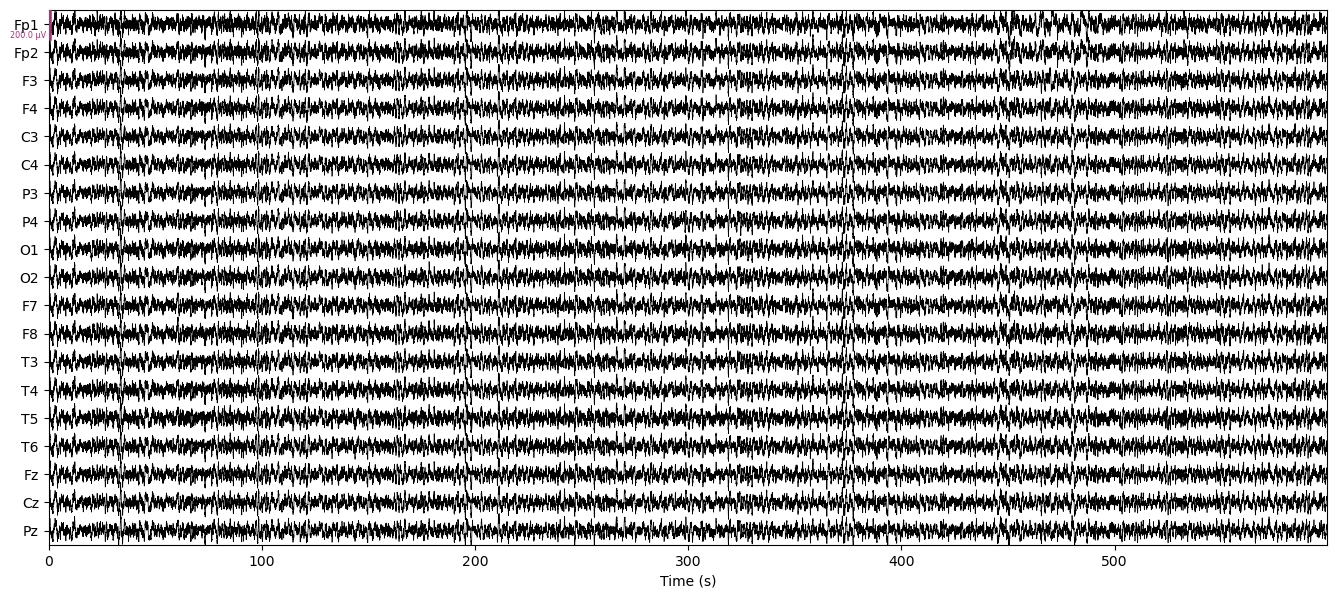

In [9]:
eeg_channels = mne.pick_types(raw.info, eeg=True, meg=False, stim=False, eog=False, exclude='bads')

fig = raw.plot(n_channels=len(eeg_channels), scalings=dict(eeg=1e-4),
               title='EEG Data', show=False, block=True, duration=600,
               show_scrollbars=False, show_scalebars=True
               )
fig.set_size_inches(14, 6)
plt.show()

**Only Channel FP1**


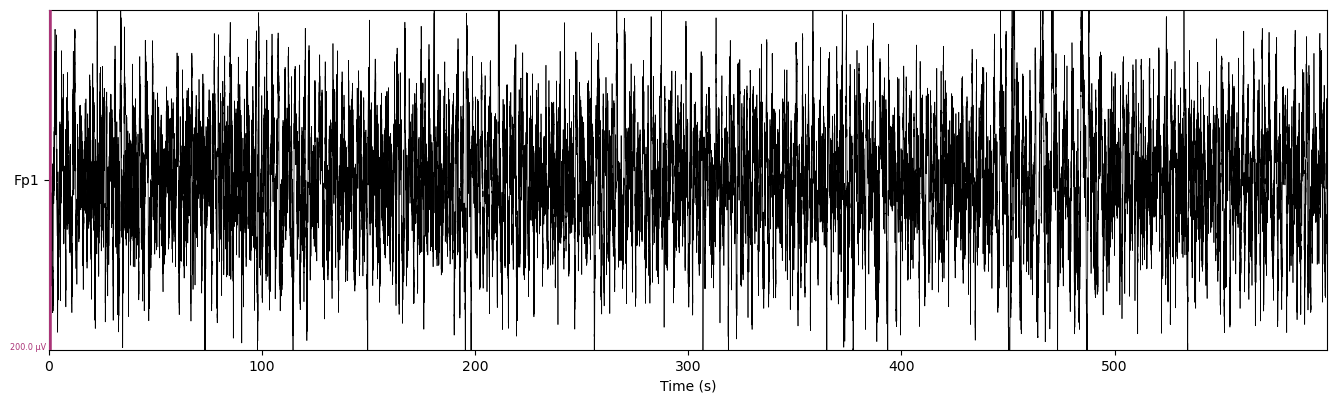

In [10]:
fig = raw.plot(n_channels=1, scalings=dict(eeg=1e-4),
               title='EEG Data', show=False, block=True, duration=600,
               show_scrollbars=False, show_scalebars=True
               )
fig.set_size_inches(14, 4)
plt.show()

**Only first 25 seconds from Channel FP1**


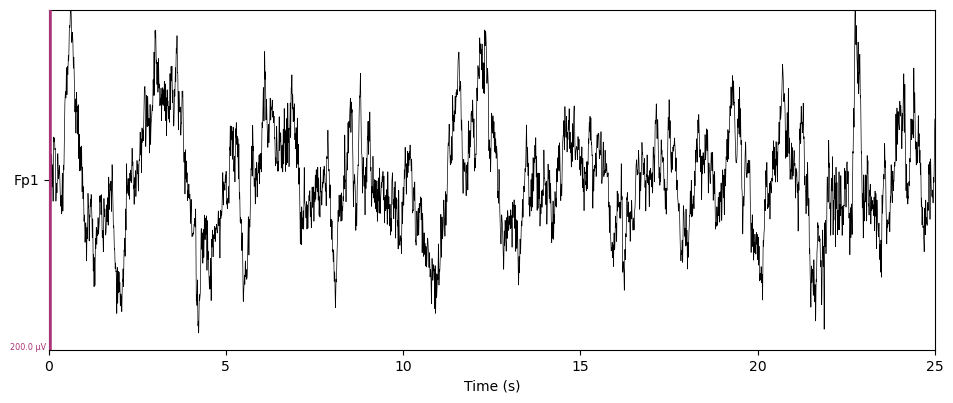

In [11]:
fig = raw.plot(n_channels=1, scalings=dict(eeg=1e-4),
               title='EEG Data', show=False, block=True, duration=25,
               show_scrollbars=False, show_scalebars=True
               )
fig.set_size_inches(10, 4)
plt.show()

**Only Raw Data vs Raw Data Filtered**


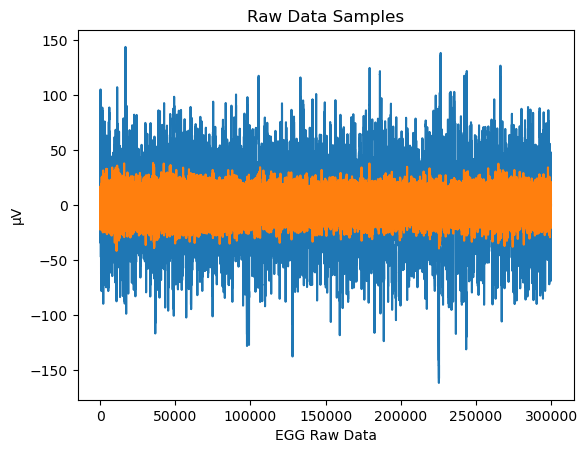

In [12]:
a = raw.copy().pick(['Fp1']).get_data()
eeg_data = np.transpose(a)

b = raw.copy().filter(5,45, verbose=False).pick(['Fp1']).get_data()
eeg_data_filtered = np.transpose(b)

plt.plot(eeg_data*1e6)
plt.plot(eeg_data_filtered*1e6)
plt.xlabel('EGG Raw Data')
plt.ylabel('µV')
plt.title('Raw Data Samples')
plt.show()

**Power Spectral Density**


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


/Users/sobieddch/opt/anaconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/Users/sobieddch/opt/anaconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
/Users/sobieddch/opt/anaconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


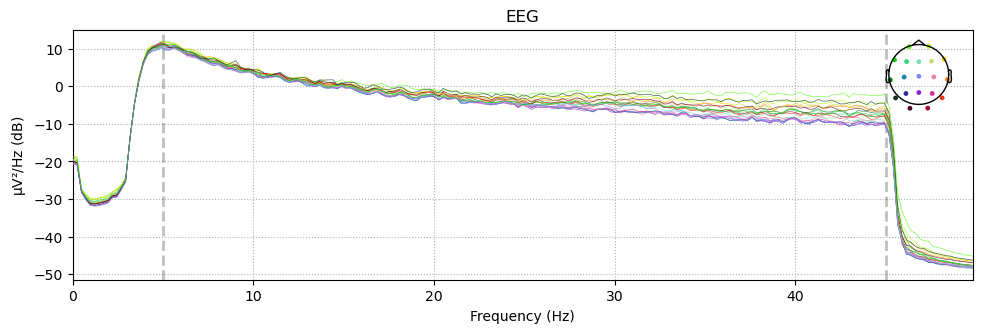

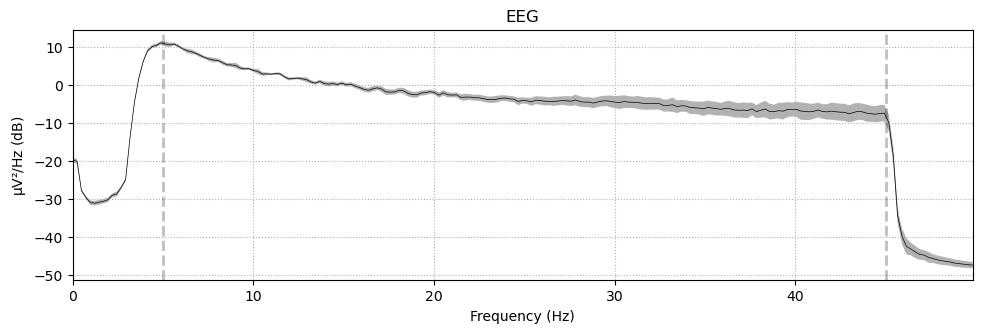

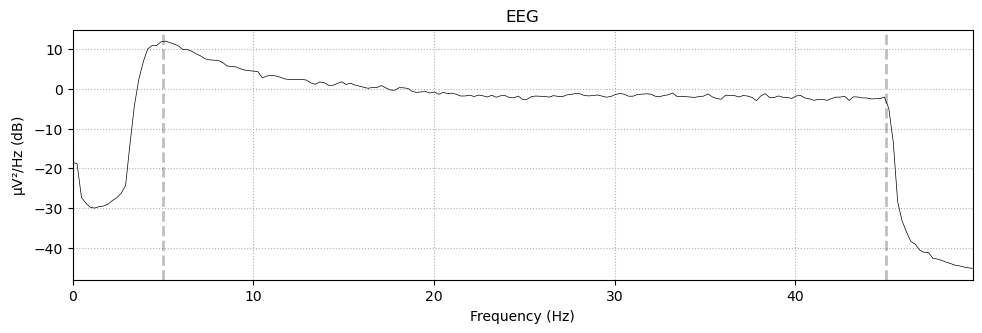

In [24]:
raw_filtered = raw.copy().filter(5,45, verbose=False)
fig1 = raw_filtered.compute_psd(fmax=50).plot(picks='data', exclude='bads')
fig2 = raw_filtered.compute_psd(fmax=50).plot(picks='data', exclude='bads',average=True)
fig3 = raw_filtered.compute_psd(fmax=50).plot(picks=['Fp1'], exclude='bads',average=True)

plt.show()

### Create Fixed Events


In [25]:
events = mne.make_fixed_length_events(raw, start=0, duration=10.0, overlap=0)

event_label = 1
num_events = events.shape[0]
event_ids = np.arange(num_events) + event_label
events[:, 2] = event_ids

print(events.shape)
events[:10]

(59, 3)


array([[    0,     0,     1],
       [ 5000,     0,     2],
       [10000,     0,     3],
       [15000,     0,     4],
       [20000,     0,     5],
       [25000,     0,     6],
       [30000,     0,     7],
       [35000,     0,     8],
       [40000,     0,     9],
       [45000,     0,    10]])

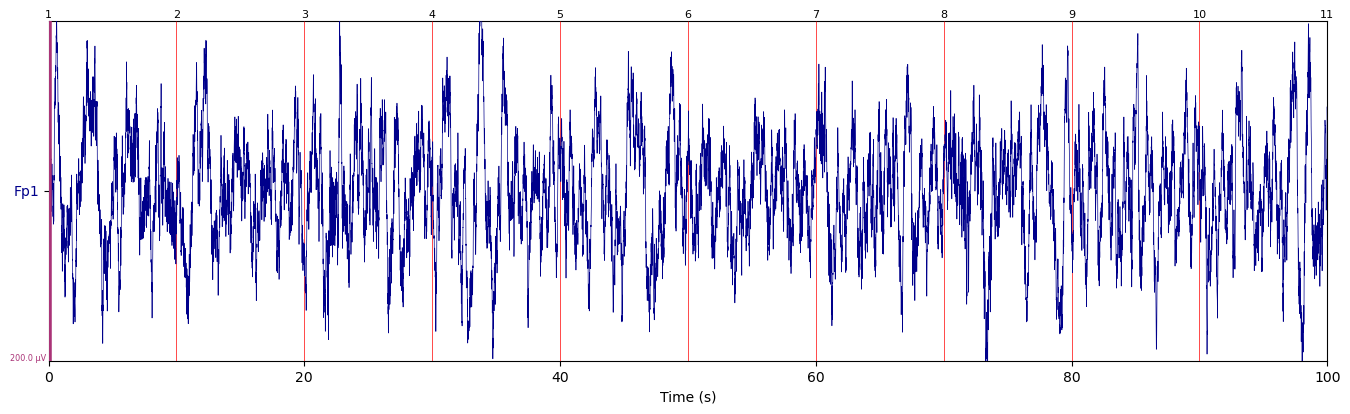

In [26]:
fig = raw.copy().pick(['Fp1']).plot(
    events=events,
    scalings=dict(eeg=1e-4),
    start=0,
    duration=100,
    color="darkblue",
    event_color="r",
    show_scrollbars=False, show_scalebars=True, show=False, block=True
)

fig.set_size_inches(14, 4)
plt.show()

### Create Fixed Epochs


In [27]:
epochs = mne.Epochs(raw.copy().pick(['Fp1']), events, tmin=0, tmax=100, baseline=None, verbose=False)
epochs

Number of events,59
Events,1: 110: 111: 112: 113: 114: 115: 116: 117: 118: 119: 12: 120: 121: 122: 123: 124: 125: 126: 127: 128: 129: 13: 130: 131: 132: 133: 134: 135: 136: 137: 138: 139: 14: 140: 141: 142: 143: 144: 145: 146: 147: 148: 149: 15: 150: 151: 152: 153: 154: 155: 156: 157: 158: 159: 16: 17: 18: 19: 1
Time range,0.000 – 100.000 s
Baseline,off


Using data from preloaded Raw for 9 events and 50001 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 9 events and 50001 original time points ...


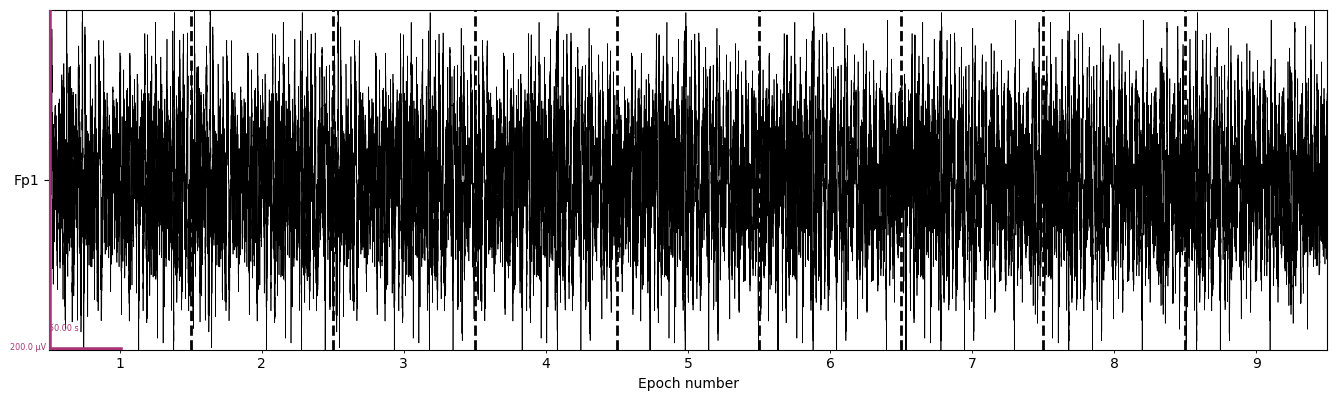

In [28]:
catch_trials_and_buttonpresses = mne.pick_events(events, include=[1,2,3])
fig = epochs[1:10].plot(
        events=catch_trials_and_buttonpresses,
        scalings=dict(eeg=1e-4),
        event_color="r",
        show_scrollbars=False, show_scalebars=True, show=False, block=True
)

fig.set_size_inches(14, 4)
plt.show()

## Read All files


In [38]:
#%cd '/content/alzheimer_dataset/derivatives'
#dir_list = [f for f in os.listdir() if os.path.isdir(os.path.join('.', f))]

path = os.getcwd()+'/dataset/derivatives'

dir_list = os.listdir(path)
dir_list.sort()

print(len(dir_list))
print(dir_list[:10])

88
['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010']


In [40]:
raws = []

for l in dir_list:
  folder = os.getcwd()+'/dataset/derivatives/'+l+'/eeg/'
  f = l+'_task-eyesclosed_eeg.set'
  #print(l)
  r = mne.io.read_raw_eeglab(folder+f, preload=False, verbose='CRITICAL')
  raws.append(r)

print('EEG Files Loaded:',len(raws))

EEG Files Loaded: 88


# Data Preprocessing


## Reviewing the Main Data from All Files


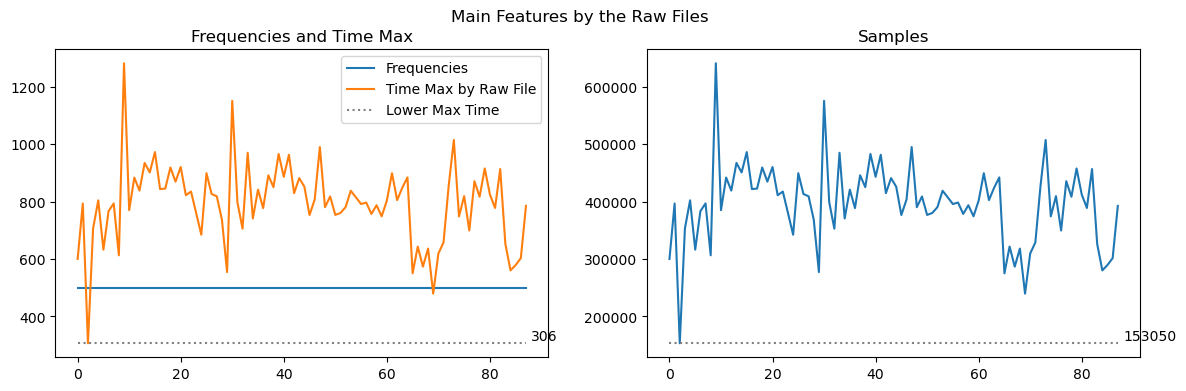

In [41]:
frequencies = []
time_max = []
samples = []
channels = []

for r in raws:
  frequencies.append(r.info['sfreq'])
  time_max.append(r.tmax)
  samples.append(len(r))
  channels.append(len(r.ch_names))

low_max_time = np.full(len(raws), min(time_max))
low_samples = np.full(len(raws), min(samples))

fig, axs = plt.subplots(1, 2)
fig.suptitle('Main Features by the Raw Files')

axs[0].plot(frequencies, label='Frequencies')
axs[0].plot(time_max, label='Time Max by Raw File')
axs[0].plot(low_max_time, linestyle='dotted', c='gray', label='Lower Max Time')
axs[0].text(len(raws), min(time_max), round(min(time_max)), ha='left', va='bottom')
axs[0].set_title('Frequencies and Time Max')
axs[0].legend()

axs[1].plot(samples)
axs[1].set_title('Samples')
axs[1].plot(low_samples, linestyle='dotted', c='gray', label='Lower Samples')
axs[1].text(len(raws), min(samples), round(min(samples)), ha='left', va='bottom')

fig.set_size_inches(14, 4)
plt.show()

## Feature Extraction


### Data Filtering


In [42]:
l_freq = 5
h_freq = 45
pick_ch = 'Fp1'

raws_filtered = []

for r in raws:
  rf = r.copy().filter(l_freq=l_freq, h_freq=h_freq, verbose=False).pick(pick_ch, verbose=False)
  raws_filtered.append(rf)

print('Raw Data Files Filtered:',len(raws_filtered))

Raw Data Files Filtered: 88


### Events & Epochs


In [43]:
# Parameters to create the events
duration = 10.0
overlapping = 2.0

# Parameters to create the epochs
tmin = 0
tmax = 300

# List of Events and Epochs
events_list = []
epochs_list = []

for r in raws_filtered:
  # Create Events
  events = mne.make_fixed_length_events(r, duration=duration, overlap=overlapping)
  event_ids = np.arange(events.shape[0]) + event_label
  events[:, 2] = event_ids
  events_list.append(events)

  # Create Epochs
  epochs = mne.Epochs(r, events, tmin=tmin, tmax=tmax, baseline=None, verbose=False)
  epochs_list.append(epochs)
